# fxローソク足チャートとMACDをプロット

* csvファイルからfxヒストリカルデータを読み出し
* `matplotlib.finance` を利用してローソク足チャートをプロット
* MACDを計算してプロット

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

## ヒストリカルデータをCSVファイルから読み取り

In [3]:
csv=pd.read_csv('USDJPY60.csv',
                 sep=',',
                 names=('YY.MM.DD', 'HH:MM', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'),
                 index_col=['YY.MM.DD', 'HH:MM'])

## ヒストリカルデータを日付でフィルタリング

In [4]:
data=csv # すべてのデータ
#data=csv['2017.02.01':'2017.02.09'] # 2017/2/1から2/9までのデータ
#data=csv['2016.09.01':'2016.10.31']
data

OPEN     HIGH      LOW    CLOSE  VOLUME
YY.MM.DD   HH:MM                                            
2016.08.05 22:00  101.738  101.813  101.733  101.753     615
           23:00  101.750  101.825  101.732  101.778    1091
2016.08.08 00:00  101.959  102.000  101.845  101.906    1652
           01:00  101.906  102.257  101.852  102.230    2419
           02:00  102.228  102.253  102.042  102.053    1374
           03:00  102.053  102.141  101.911  102.099    2308
           04:00  102.096  102.143  102.020  102.142    1296
           05:00  102.138  102.144  101.976  102.036     695
           06:00  102.037  102.069  101.926  102.011     730
           07:00  102.014  102.059  101.954  102.004     546
           08:00  102.000  102.083  101.983  102.072     639
           09:00  102.077  102.196  102.032  102.185     738
           10:00  102.182  102.306  102.102  102.291    1393
           11:00  102.288  102.328  102.212  102.277    1063
           12:00  102.278  102.454  102.246  102.396    1090
           13:00  102.400  102.431  102.310  102.330     900
           14:00  102.327  102.417  102.307  102.409     614
           15:00  102.413  102.488  102.388  102.483     876
           16:00  102.486  102.652  102.463  102.573    1275
           17:00  102.577  102.578  102.434  102.525    1324
           18:00  102.528  102.620  102.521  102.530     869
           19:00  102.528  102.568  102.494  102.568     202
           20:00  102.571  102.585  102.471  102.489     257
           21:00  102.492  102.500  102.358  102.478     421
           22:00  102.476  102.485  102.416  102.435     321
           23:00  102.438  102.464  102.426  102.447     239
2016.08.09 00:00  102.363  102.492  102.359  102.401    1210
           01:00  102.401  102.468  102.391  102.448     472
           02:00  102.447  102.447  102.268  102.283     752
           03:00  102.284  102.397  102.278  102.361    1090
...                   ...      ...      ...      ...     ...
2017.02.16 18:00  113.333  113.367  113.124  113.351    4418
           19:00  113.354  113.442  113.261  113.358    1652
           20:00  113.362  113.472  113.225  113.318    2172
           21:00  113.321  113.358  113.075  113.110    1776
           22:00  113.111  113.246  113.087  113.233    1431
           23:00  113.236  113.273  113.215  113.241     446
2017.02.17 00:00  113.228  113.321  113.161  113.286    1547
           01:00  113.286  113.340  113.227  113.318    1003
           02:00  113.315  113.489  113.240  113.408    2410
           03:00  113.408  113.501  113.375  113.458    1515
           04:00  113.454  113.480  113.401  113.442     931
           05:00  113.447  113.458  113.267  113.289    1325
           06:00  113.293  113.412  113.288  113.333    1063
           07:00  113.333  113.432  113.333  113.377     896
           08:00  113.377  113.410  113.318  113.376     921
           09:00  113.376  113.468  113.318  113.417    1498
           10:00  113.417  113.434  113.131  113.177    2398
           11:00  113.174  113.199  112.815  112.924    3175
           12:00  112.927  112.935  112.697  112.859    2751
           13:00  112.862  113.004  112.817  112.890    1660
           14:00  112.894  112.937  112.755  112.851    1716
           15:00  112.853  112.874  112.616  112.780    2580
           16:00  112.778  112.931  112.734  112.818    3275
           17:00  112.818  112.973  112.733  112.828    3998
           18:00  112.824  112.920  112.730  112.871    2380
           19:00  112.867  112.896  112.773  112.838    1257
           20:00  112.842  112.885  112.795  112.856     779
           21:00  112.853  112.966  112.849  112.930     843
           22:00  112.926  112.942  112.872  112.919     929
           23:00  112.916  112.918  112.739  112.767    1269

[3312 rows x 5 columns]

In [5]:
# dates=[pd.to_datetime(i[0] + ' ' + i[1]) for i in data.index]

## データ整形
* dates[], op[], cl[], hi[], lo[]
    * 日付リスト, 始値リスト, 終値リスト, 最高値リスト, 最低値リスト
* candle[]
    * ローソク足チャート描画用データ (日付, 始値, 終値, 最高値, 最低値)

In [6]:
dates = []
candle = []
for i, v in data.iterrows():
    t = pd.to_datetime(i[0] + ' ' + i[1]);
    dates.append(t)
    candle.append((date2num(t), v['OPEN'], v['CLOSE'], v['HIGH'], v['LOW']))

In [7]:
op=data['CLOSE'].tolist()
cl=data['CLOSE'].tolist()
hi=data['HIGH'].tolist()
lo=data['LOW'].tolist()

## MACD

1時間足の終値 `cl[]` を使用してMACDを計算

In [8]:
def ema(l, t):
    result = []
    for p in l:
        i = len(result)
        if i < t: # t日目までは単純平均
            result += [float(sum(result) + p) / (i + 1)]
        else:
            last = result[-1]
            result += [last + 2. * (p - last) / (t + 1)]
    return result

In [9]:
prices = cl
ema12 = np.array(ema(prices, 12))
ema24 = np.array(ema(prices, 24))
macd = ema12 - ema24
signal = np.array(ema(macd, 9))

## ローソク足チャート, MACDをプロット

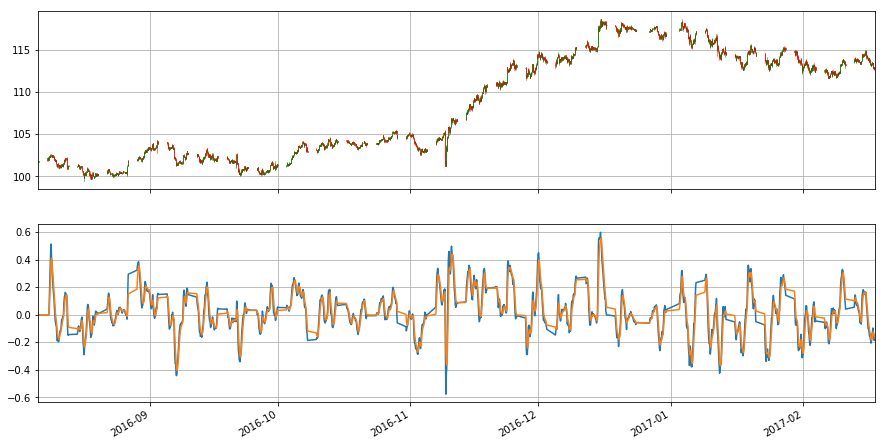

In [10]:
fig = plt.figure(figsize=(15, 8))

# candle chart
ax = fig.add_subplot(211)
ax.grid()
ax.set_xlim(dates[0], dates[-1])
mf.candlestick_ochl(ax, candle, width=0.02, colorup='g', colordown='r', alpha=0.75)
fig.autofmt_xdate()

# MACD
ax = fig.add_subplot(212)
ax.grid()
ax.set_xlim(dates[0], dates[-1])
ax.plot(dates, macd)
ax.plot(dates, signal)
fig.autofmt_xdate()

## SignalとMACDの差分をプロット

`(signal-MACD)=0.0` ・・・ signalとMACDがクロスしたポイント

In [11]:
diff = signal - macd

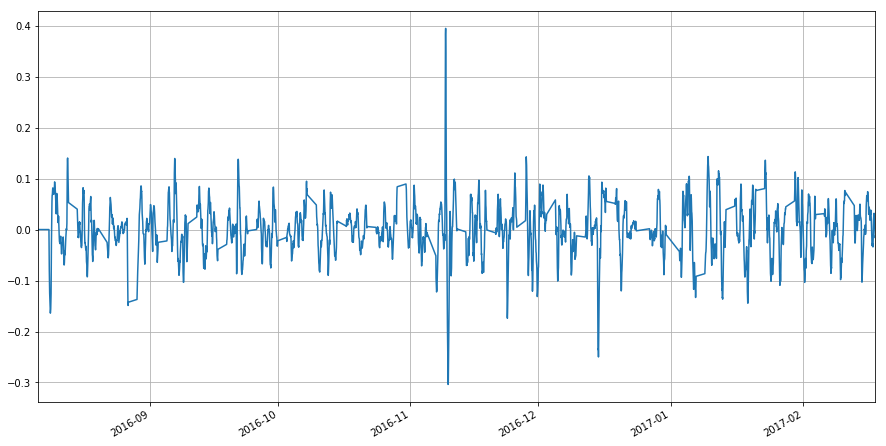

In [12]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(dates[0], dates[-1])
ax.plot(dates, diff)
fig.autofmt_xdate()

# SignalとMACDのクロスを利用した売買シミュレーション

## 売買シミュレーション1

* SignalとMACDのクロスを、買いシグナルと売りシグナルとして用いる。

* シグナルでポジションを建てて、次のシグナルで決済した場合のプロフィットを計算する。

In [13]:
skip = True
position = 0
profit = []
for i in range(len(diff)):
    if skip==True and diff[i]==0:
        continue
    elif skip==True:
        flag = True if diff[0] > 0 else False
        skip = False
        continue
    if flag==True and diff[i] < 0:
        #print "買いシグナル %s %f %f" % (dates[i], prices[i], position - prices[i])
        if position != 0:
            profit.append(position - prices[i])
        position = prices[i]
        flag = False
    elif flag==False and diff[i] > 0:
        #print "売りシグナル %s %f %f" % (dates[i], prices[i], prices[i] - position)
        if position != 0:
            profit.append(prices[i] - position)
        position = prices[i]
        flag = True

unit = 1
print "%d trades" % len(profit)
print "profit total %f average %f min %f max %f" % (sum(profit)*unit, sum(profit)*unit/len(profit), min(profit)*unit, max(profit)*unit)

243 trades
profit total 14.169000 average 0.058309 min -1.264000 max 2.559000


* 1回のトレードで1通貨(1ドル)の取引とする。
* 1トレードあたり平均0.058309円の利益が出た。
* 最も良いときで2.559円の利益が出た。
* 最も悪いときで-1.264円の損失が出た。
* トータルでは14.169円の利益が出た。

## 売買シミュレーション (2)

* SignalとMACDのクロスを、買いシグナルと売りシグナルとして用いる。

* シグナルでポジションを建て、次のシグナルまでの間に最も利益を出す（最も損失を少なくする）ポイントで決済できたと仮定した場合のプロフィットを計算する。

In [16]:
skip = True
position = []
profit = []
for i in range(len(diff)):
    #print "%s open %f close %f high %f low %f" % (dates[i], op[i], cl[i], hi[i], lo[i])
    if skip==True and diff[i]==0:
        continue
    elif skip==True:
        flag = True if diff[0] > 0 else False
        skip = False
        continue
    if len(position)==2:
        #現ポジションを評価
        v=0
        if flag==True:
            #売りポジション
            v=position[0]-lo[i]
        else:
            #買いポジション
            v=hi[i]-position[0]
        if position[1] < v:
            if v>0:
                #print "profit gain %f" % v
                pass
            else:
                #print "profit loss %f" % v
                pass
            position[1] = v
    if flag==True and diff[i] < 0:
        #現ポジション結果保存
        if len(position)==2:
            profit.append(position[1])
        #新規ポジション
        #print "買い"
        position = [prices[i], -99999] #[買ポジション価格, 最大益]
        flag = False
    elif flag==False and diff[i] > 0:
        #前ポジション結果保存
        if len(position)==2:
            profit.append(position[1])
        #新規ポジション
        #print "売り"
        position = [prices[i], -99999] #[売ポジション価格, 最大益]
        flag = True

unit = 1
print "%d trades" % len(profit)
print "profit total %f average %f min %f max %f" % (sum(profit)*unit, sum(profit)*unit/len(profit), min(profit)*unit, max(profit)*unit)

243 trades
profit total 130.250000 average 0.536008 min -0.093000 max 3.509000


* 1回のトレードで1通貨(1ドル)の取引とする。
* 1トレードあたり平均0.536008円の利益が出た。
* 最も良いときで3.509円の利益が出た。
* 最も悪いときで-0.093円の損失が出た。
* トータルでは130.25円の利益が出た。

10000通貨なら5360円の利益。

10000通貨で243回トレードすれば 1,302,480円の利益。

In [17]:
average = sum(profit)*unit/len(profit)
n = len(filter(lambda x: x > average, profit))
print "average %f good trade %d profit %f" % (average, n, average*n)

average 0.536008 good trade 87 profit 46.632716


* 1トレードあたりの平均利益0.536008円を上回る利益を出せたトレードは、243トレード中、87トレードだった。
* 決済ルールを **0.536008円の利益が出たら決済** とすると、その87トレードだけで、46.632716円の利益を出せた。
* 残りの156トレードの決済ルールを **次のシグナルが来たら決済** とするとどうなるか。

In [20]:
skip = True
rule = 0.536008 # プロフィットがこれを超えたら決済せよ
position = []
profit = []
for i in range(len(diff)):
    #print "%s open %f close %f high %f low %f" % (dates[i], op[i], cl[i], hi[i], lo[i])
    if skip==True and diff[i]==0:
        continue
    elif skip==True:
        flag = True if diff[0] > 0 else False
        skip = False
        continue
    if len(position)==2 and position[1]==False: #現ポジションが未決済か?
        #現ポジションを評価
        v=0
        if flag==True:
            #売りポジション
            v=position[0]-lo[i]
        else:
            #買いポジション
            v=hi[i]-position[0]
        if rule < v:
            #現ポジション結果保存
            profit.append(rule) # ruleの価格で決済
            position[1]=True # 決済済み
            #print "fixed profit %f" % profit[-1]
    if flag==True and diff[i] < 0:
        #新規ポジション
        if len(position)==2 and position[1]==False:
            profit.append(position[0]-prices[i])
            #print "fixed profit %f" % profit[-1]
        #print "買い"
        position = [prices[i], False] #[買ポジション価格, 未決済]
        flag = False
    elif flag==False and diff[i] > 0:
        #前ポジション結果保存
        if len(position)==2 and position[1]==False:
            profit.append(prices[i]-position[0])
            #print "fixed profit %f" % profit[-1]
        #新規ポジション
        #print "売り"
        position = [prices[i], False] #[売ポジション価格, 未決済]
        flag = True

unit = 1
print "%d trades" % len(profit)
print "profit total %f average %f min %f max %f" % (sum(profit)*unit, sum(profit)*unit/len(profit), min(profit)*unit, max(profit)*unit)

243 trades
profit total 7.837696 average 0.032254 min -1.264000 max 0.536008


* 1トレードあたり平均0.032254円の利益が出た。
* 最も良いときで0.536円の利益が出た。
* 最も悪いときで-1.264円の損失が出た。
* トータルでは7.837696円の利益が出た。

10000通貨なら322.254円の利益。

10000通貨で243回トレードすれば、78,376.96円の利益。ちょっと寂しい。

## 検討事項

* **0.536008円の利益が出ないトレード**の決済ルールを洗練させる必要あり。

* シグナル発生時の状態（出来高や前シグナルとの高低差）と利益の間に相関関係がないだろうか?

* リアルタイムのデータを取るにはどうすれば?

## 検討(1) 0.536008円の利益が出ないトレードの決済ルール

* 前回は、0.536008円の利益が出たら決済、出なかったら次のシグナルで決済、というルールにした。

* ある程度で損切りするルールを追加しないと、損失が大きくなってしまう。

* そこで過去のトレードから利幅の平均を求め、その利幅のボトムを下回ったら損切りするルールを考えてみる。

* つまり、SignalとMACDのクロスでx円の買いポジションを建て、そこから次のクロスまでの間の値動きの中で、最も値が上ったときでx+0.5円、最も値が下がったときでx-0.1円とすると、利幅は-0.1〜0.5である。

* この利幅の下限の平均値を下回ったら損切りするルールとする。

## 売買シミュレーション (3)

* SignalとMACDのクロスを、買いシグナルと売りシグナルとして用いる。

* シグナルでポジションを建て、次のシグナルまでの期間での利幅 `lower ~ upper` を得る。

* 複数のトレードから`upper, lower` の平均値 `Eu, El` を求める。

* 評価益が `upper` を上回るか、評価損が `lower` 下回るか、次のシグナルが発生したとき決済するルールとする。

* `upper` の利益を得られるトレードの発生確率 `Pu`、`lower` の損失が発生するトレードの発生確率 `Pl` を計算する。

* `upper` と `lower` の間でうろうろしたトレードの発生確率は `1-(Pu+Pl)` となる。

* うろうろしたトレードの損益はトータルで0だったと仮定する。

* トレード数を多くすれば、プロフィットの期待値は `Pu * Eu + Pl * El` と考えることができるのではないだろうか。

In [21]:
skip = True
position = []
upper = []
lower = []
for i in range(len(diff)):
    #print "%s open %f close %f high %f low %f" % (dates[i], op[i], cl[i], hi[i], lo[i])
    if skip==True and diff[i]==0:
        continue
    elif skip==True:
        flag = True if diff[0] > 0 else False
        skip = False
        continue
    if len(position)==3:
        #現ポジションを評価
        u=0
        l=0
        if flag==True:
            #売りポジション
            u=position[0]-lo[i]
            l=position[0]-hi[i]
        else:
            #買いポジション
            u=hi[i]-position[0]
            l=lo[i]-position[0]
        if position[1] < u:
            position[1] = u
        if position[2] > l:
            position[2] = l
    if flag==True and diff[i] < 0:
        #現ポジション結果保存
        if len(position)==3:
            upper.append(position[1])
            lower.append(position[2])
        #新規ポジション
        #print "買い"
        position = [prices[i], -99999,99999] #[買ポジション価格, 最大益,最大損]
        flag = False
    elif flag==False and diff[i] > 0:
        #前ポジション結果保存
        if len(position)==3:
            upper.append(position[1])
            lower.append(position[2])
        #新規ポジション
        #print "売り"
        position = [prices[i], -99999,99999] #[売ポジション価格, 最大益,最大損]
        flag = True

unit = 1
print "%d trades" % len(upper)
average=sum(upper)/len(upper)
n=len(filter(lambda x: x > average, upper))
p=1.0*n/len(upper)*100
profit=average*n
print "upper average %f good trade %d (%.1f%%)" % (average, n, p)
average=sum(lower)/len(lower)
n=len(filter(lambda x: x < average, lower))
p=1.0*n/len(lower)*100
profit+=average*n
print "lower average %f bad trade %d (%.1f%%)" % (average, n, p)
print "expected profit %f" % profit

243 trades
upper average 0.536008 good trade 87 (35.8%)
lower average -0.297926 bad trade 94 (38.7%)
expected profit 18.627679


* 例えば1トレードでの取引通貨単位を10000通貨とする。

* 35.8%の確率で1トレードあたり5360.08円の利益、38.3%の確率で1トレードあたり2979.26円の損失、残り25.9%のトレードは損益がほぼ0。

* 1トレードの期待値は、`5360.08*0.358-2979.26*0.383=777.852円`

* 243回トレードでの期待値は、`777.852*243=189,018.036円`

前回が1トレードあたり利益322.254円だったので倍に増えた。